[Back to Index](../../../index.html)

Gini impurity is a measure used in decision tree algorithms to quantify the diversity or purity of a node with respect to the classes of the training data it contains. It represents the probability of incorrectly classifying a randomly chosen element from the dataset if it were randomly labeled according to the distribution of labels in the node. 

The value of Gini impurity ranges from 0 to 0.5 in binary classification, with 0 indicating that all elements belong to a single class (pure node), and 0.5 indicating that the elements are evenly distributed across the classes (maximally impure node). 

The formula for Gini impurity is 

$$G = 1 - \sum (p_i^2)$$

where $p_i$ is the probability of class $i$ within the node. 

In the context of building a decision tree, we seek splits that result in child nodes with the lowest possible Gini impurity, which corresponds to the most homogeneous or 'pure' subsets with respect to the target variable.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Gini impurity function
def gini_impurity(*probabilities):
    return 1 - sum((p**2 for p in probabilities)) # Gini = 1 - sum(p_i^2)

def calc_entropy(*probabilities):
    entropies = [sum(p * -np.log2(p) for p in probs if p > 0) for probs in zip(*probabilities)]
    return entropies

def plot_gini_impurity_2_probabilities():
    p1 = np.linspace(0, 1, 100)
    p2 = 1 - p1

    Gini = gini_impurity(p1, p2)
    entropy = calc_entropy(p1, p2)

    # Plotting
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(p1, p2, Gini, label='Gini Impurity')
    ax.plot(p1, p2, entropy, label='Entropy')
    ax.set_xlabel('Probability of Class 1 (p1)')
    ax.set_ylabel('Probability of Class 2 (p2)')
    ax.set_zlabel('Impurity Index')
    ax.set_title('Gini Impurity and Entropy as Functions of p1 and p2')
    ax.legend()


    plt.show()


def plot_gini_impurity_3_probabilities():
    # Generate a grid of probability values
    p1_values = np.linspace(0, 1, 50)
    p2_values = np.linspace(0, 1, 50)

    # Create an empty list to store the Gini impurity values
    Gini_values = []
    p1_list = []
    p2_list = []
    p3_list = []
    # Calculate the Gini impurity for each combination of p1 and p2
    for p1 in p1_values:
        for p2 in p2_values:
            p3 = 1 - p1 - p2
            if p3 >= 0:
                # Gini = gini_impurity(p1, p2, p3)
                p1_list.append(p1)
                p2_list.append(p2)
                p3_list.append(p3)
    
    gini_values = gini_impurity(np.array(p1_list), np.array(p2_list), np.array(p3_list))
    entropy = calc_entropy(np.array(p1_list), np.array(p2_list), np.array(p3_list))
    
    gini_values = np.array(gini_values)
    entropy = np.array(entropy)

    # Plotting
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(p1_list, p2_list, p3_list, c=gini_values, cmap='viridis')
    sc = ax.scatter(p1_list, p2_list, p3_list, c=entropy, cmap='viridis')
    ax.set_xlabel('Probability of Class 1 (p1)')
    ax.set_ylabel('Probability of Class 2 (p2)')
    ax.set_zlabel('Probability of Class 3 (p3)')
    ax.set_title('Gini Impurity as a function of p1, p2, and p3')
    fig.colorbar(sc, label='Gini Impurity')
    plt.show()


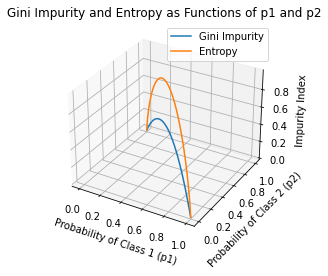

In [15]:
plot_gini_impurity_2_probabilities()

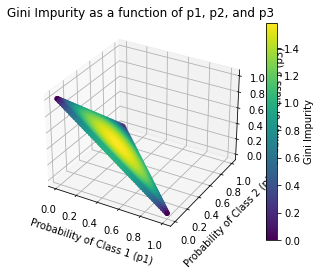

In [16]:
plot_gini_impurity_3_probabilities()   